<a href="https://colab.research.google.com/github/thiagoteles10/EDA-aluguel-de-imoveis/blob/main/EDA_Aluguel_de_im%C3%B3veis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução


A análise de dados é uma técnica poderosa para extrair informações valiosas de conjuntos de dados.

Problema : Neste caso, iremos analisar um dataset de aluguéis de imóveis com o objetivo de identificar padrões e tendências que possam ser úteis para proprietários, locatários e agentes imobiliários.

O dataset contém informações sobre diversas propriedades disponíveis para aluguel incluindo o  o tamanho, o preço do aluguel, a localização e outras características relevantes. A partir desses dados, é possível realizar uma análise exploratória para entender melhor como as variáveis estão relacionadas entre si, bem como aplicar modelos de aprendizado de máquina para prever preços de aluguel e identificar fatores que mais influenciam no valor do aluguel.

Com a análise do dataset de aluguéis de imóveis, esperamos obter insights valiosos que possam ser usados para otimizar os negócios imobiliários, ajudar locatários a encontrar o melhor imóvel para suas necessidades e ajudar proprietários a definir preços mais precisos para seus imóveis.






In [1]:
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
# carregando o dataset
df = pd.read_csv('imovel_para_aluguel.csv')

In [3]:
# visualiazando as linhas do arquivo
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Renomeando as colunas

In [4]:
df.rename({'city': 'Cidade',
              'area': 'Área (m²)',
              'rooms': 'Quartos',
              'bathroom': 'Banheiros',
              'parking spaces': 'Vagas de Estacionamento',
              'floor': 'Andar',
              'animal': 'Animal',
              'furniture': 'Mobília',
              'hoa (R$)': 'Condomínio (R$)',
              'rent amount (R$)': 'Aluguel (R$)',
              'property tax (R$)': 'IPTU (R$)',
              'fire insurance (R$)': 'Seguro de Incêndio (R$)',
              'total (R$)': 'Total (R$)'}, axis='columns', inplace=True)

In [5]:
df.replace({'acept': 'Aceita',
               'not acept': 'Não Aceita',
               'furnished': 'Mobiliado',
               'not furnished': 'Não Mobiliado'}, inplace=True)

In [6]:
# verificando se as colunas foram renomeadas
df.head(2)

,Cidade,Área (m²),Quartos,Banheiros,Vagas de Estacionamento,Andar,Animal,Mobília,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro de Incêndio (R$),Total (R$)
0,São Paulo,70,2,1,1,7,Aceita,Mobiliado,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,Aceita,Não Mobiliado,1200,4960,1750,63,7973


In [7]:
# verificando o formato do dataset
df.shape

(10692, 13)

In [8]:
# levantamento de informações a respeito do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cidade                   10692 non-null  object
 1   Área (m²)                10692 non-null  int64 
 2   Quartos                  10692 non-null  int64 
 3   Banheiros                10692 non-null  int64 
 4   Vagas de Estacionamento  10692 non-null  int64 
 5   Andar                    10692 non-null  object
 6   Animal                   10692 non-null  object
 7   Mobília                  10692 non-null  object
 8   Condomínio (R$)          10692 non-null  int64 
 9   Aluguel (R$)             10692 non-null  int64 
 10  IPTU (R$)                10692 non-null  int64 
 11  Seguro de Incêndio (R$)  10692 non-null  int64 
 12  Total (R$)               10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


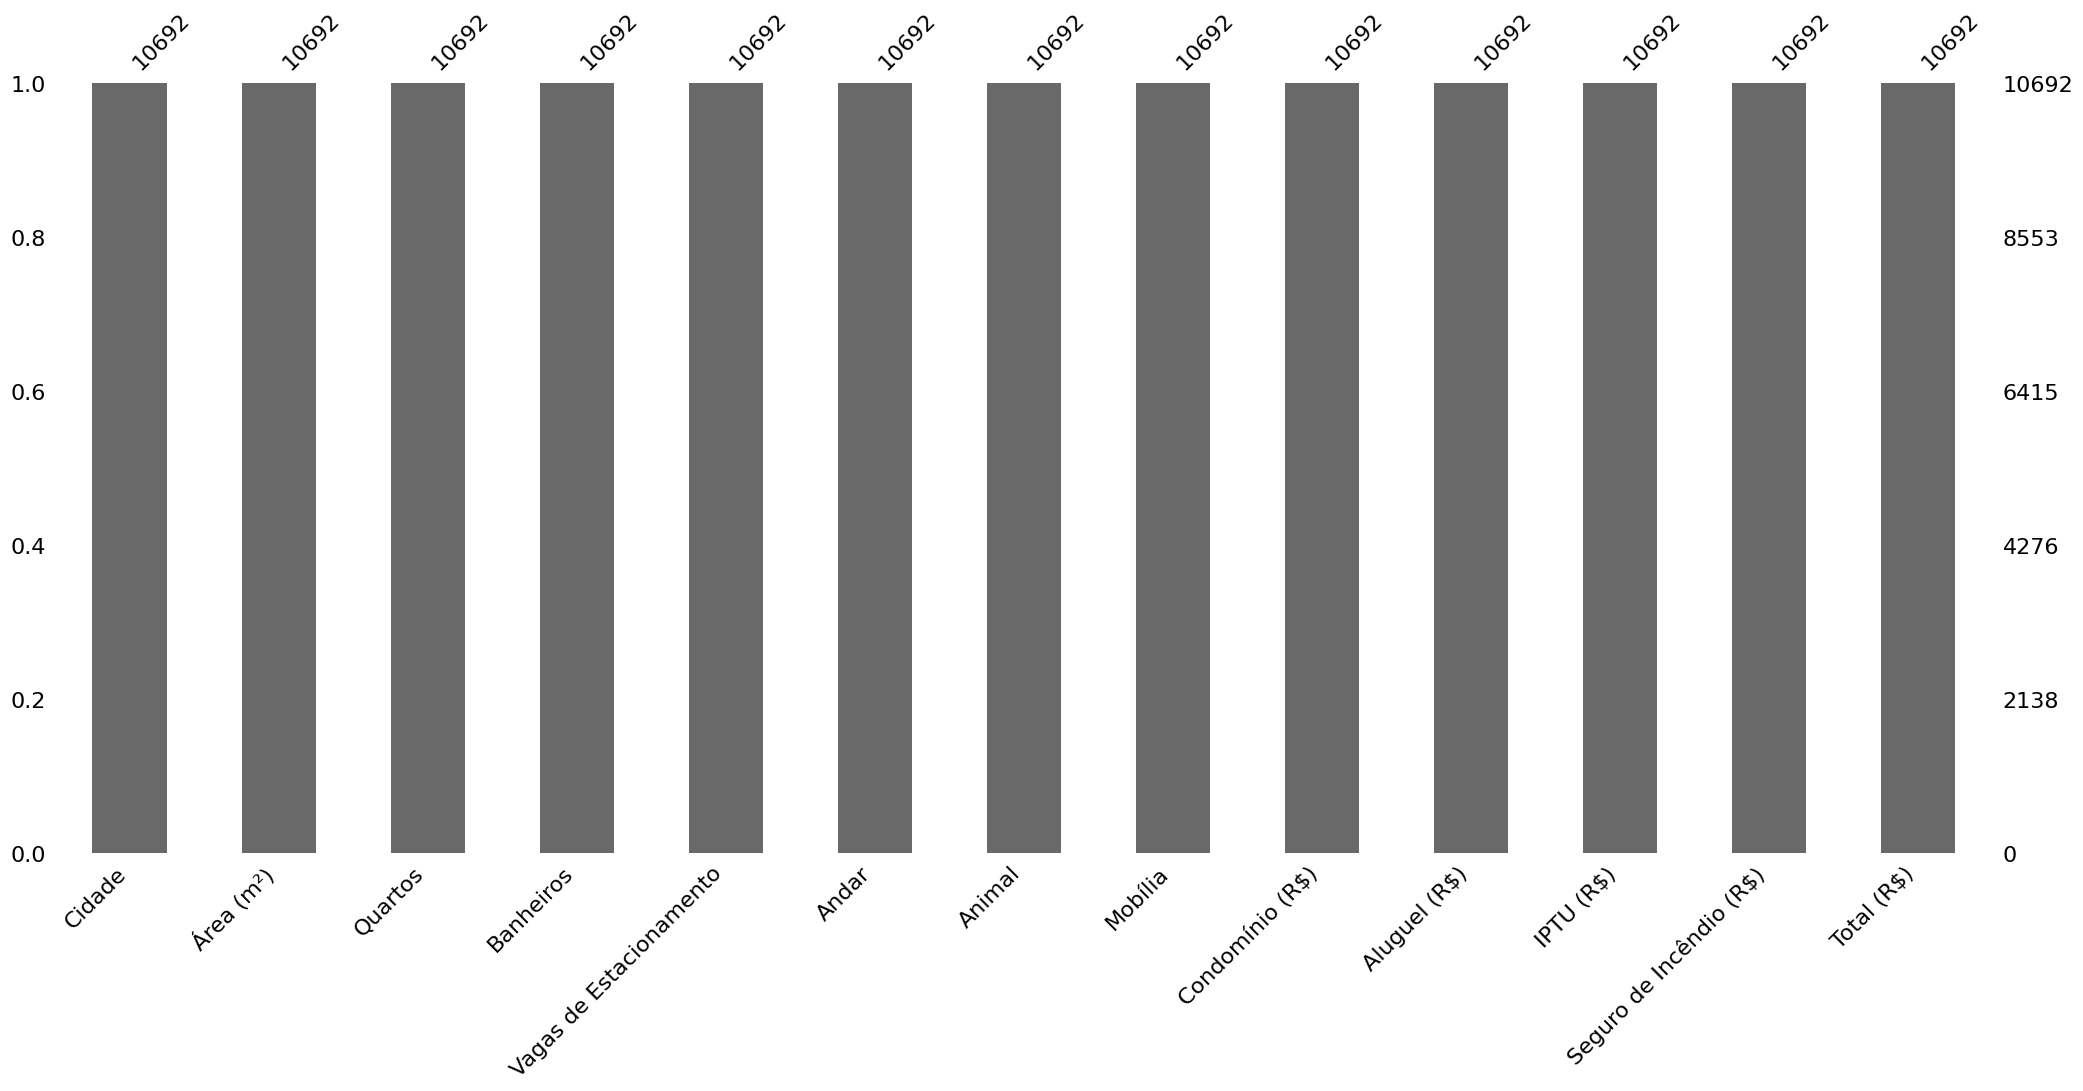

In [9]:
# verificando dados faltantes.
missingno.bar(df);

Percebemos que não existem valores faltantes do dataset

## Verificando duplicatas do dataset

In [10]:
df.duplicated().value_counts()

False    10334
True       358
dtype: int64

verificamos a presença de 358 linhas duplicadas

In [11]:
# eliminando linhas duplicadas
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    10334
dtype: int64

In [12]:
# levantamento estatístico a respeito do dataset
df.describe()

,Área (m²),Quartos,Banheiros,Vagas de Estacionamento,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro de Incêndio (R$),Total (R$)
count,10334.000000,10334.000000,10334.000000,10334.000000,1.033400e+04,10334.000000,10334.000000,10334.000000,1.033400e+04
mean,152.439423,2.539965,2.268725,1.644475,1.091244e+03,3966.296013,376.929263,54.264273,5.488943e+03
std,545.875595,1.168185,1.414650,1.598527,1.144609e+04,3436.190007,3160.602165,48.164380,1.266911e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,59.000000,2.000000,1.000000,1.000000,1.800000e+02,1598.250000,41.000000,21.000000,2.116000e+03
50%,95.000000,3.000000,2.000000,1.000000,5.710000e+02,2750.000000,130.000000,37.000000,3.685500e+03
75%,190.000000,3.000000,3.000000,2.000000,1.286750e+03,5000.000000,389.750000,70.000000,6.912000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


Aqui podemos ver que há uma diferença muito grande entre os valores dos quartis, principalmente entre o 1º e 3º. sendo assim, temos a presença de outliers que podem influenciar em nossas previsões.

Text(0, 0.5, 'Nº de imóveis')

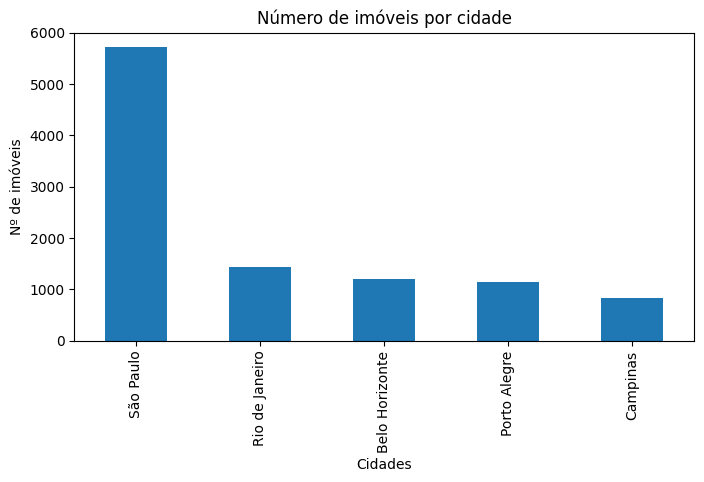

In [13]:
# verificando a distribuição dos imóveis por cidade
plt.figure(figsize=(8,4))
df['Cidade'].value_counts().plot(kind='bar')
plt.title('Número de imóveis por cidade')
plt.xlabel('Cidades')
plt.ylabel('Nº de imóveis')

## Criando uma função para pegar os valores que são outliers

In [14]:
def outliers(df, colunas):

    indices_incomuns = []
    todos_indices = np.zeros(len(df), dtype=bool)

    for coluna in colunas:

        dados_coluna = np.array(df[coluna])

        desvio = dados_coluna.std()
        media = dados_coluna.mean()

        indice_incomum = dados_coluna > (media + 3 * desvio)

        indices_incomuns.append(indice_incomum)

    for i in range(len(indices_incomuns)):

        todos_indices = np.logical_or(todos_indices, indices_incomuns[i])

    return todos_indices

In [15]:
outliers_indices = outliers(df, ['Área (m²)', 'Quartos', 'Banheiros', 'Vagas de Estacionamento', 'Condomínio (R$)',
                                    'Aluguel (R$)', 'IPTU (R$)', 'Seguro de Incêndio (R$)', 'Total (R$)'])
dados_tratados = df[~outliers_indices]

In [16]:
# verificando o dataset depois de tratar os outliers
dados_tratados.describe().round(2)

,Área (m²),Quartos,Banheiros,Vagas de Estacionamento,Condomínio (R$),Aluguel (R$),IPTU (R$),Seguro de Incêndio (R$),Total (R$)
count,9818.00,9818.00,9818.00,9818.00,9818.00,9818.00,9818.00,9818.00,9818.00
mean,129.52,2.45,2.14,1.48,905.97,3554.12,290.79,48.22,4799.28
std,110.08,1.07,1.27,1.35,1080.44,2809.08,467.10,38.50,3796.67
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,57.00,2.00,1.00,0.00,215.00,1500.00,38.00,21.00,2047.25
50%,90.00,2.00,2.00,1.00,582.00,2584.00,121.00,35.00,3501.50
75%,170.00,3.00,3.00,2.00,1245.00,4500.00,340.00,63.00,6292.75
max,1600.00,6.00,6.00,6.00,32000.00,14080.00,9500.00,198.00,32750.00


## Verificando as correlações das variáveis através de um gráfico de calor

<Axes: >

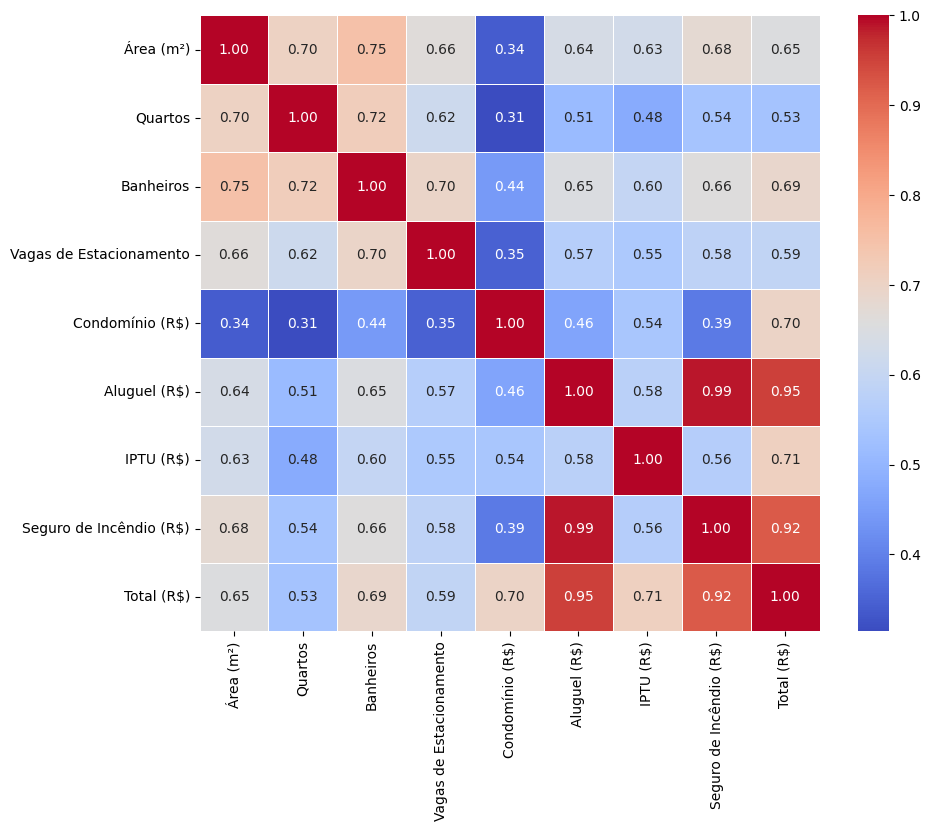

In [17]:
cor_matrix = dados_tratados.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5,fmt='.2f',cmap='coolwarm')

Vemos que algumas variáveis estão mais fortemente correlacionadas com o valor total do que outras, inclusive, temos variáveis com multicolinearidade o que pode dificultar o uso de algoritmos de previsão.

In [18]:
# Calcular o valor médio do aluguel por cidade
media_aluguel,media_aluguel.name = dados_tratados.groupby('Cidade')['Total (R$)'].mean(), 'Média aluguel R$'
desvio_padrao, desvio_padrao.name = dados_tratados.groupby('Cidade')['Total (R$)'].std(), 'Desvio padrão'
variacao, variacao.name = desvio_padrao/media_aluguel, 'Variação do aluguel'


In [19]:
dados_var = pd.concat([media_aluguel, desvio_padrao, variacao], axis='columns')
dados_var

,Média aluguel R$,Desvio padrão,Variação do aluguel
Cidade,,,
Belo Horizonte,3972.426774,3331.356623,0.838620
Campinas,3006.485535,2536.631519,0.843720
Porto Alegre,2831.789056,2331.389830,0.823292
Rio de Janeiro,4428.754636,3278.559507,0.740289
São Paulo,5747.032744,4095.178661,0.712573


Vemos que São Paulo tem a maior média do valor de aluguel e que campinas tem a maior variação nesse valor.

### Verificando a distribuição das variáveis quantitativas.

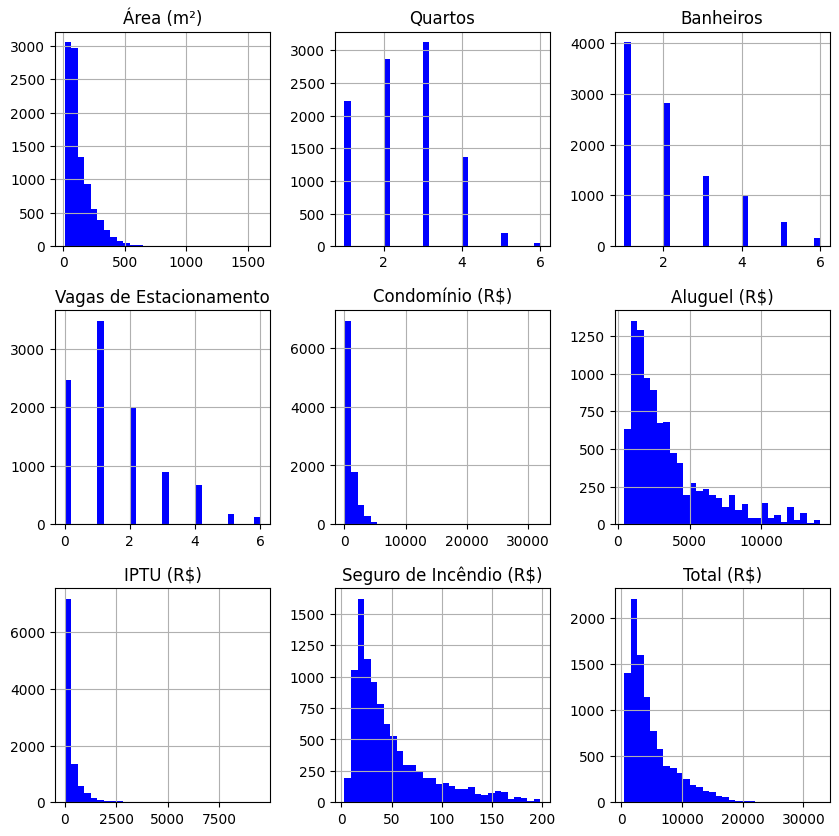

In [20]:
dados_tratados.hist(bins=30,figsize=(10,10),color='blue');


vemos que a maioria das distribuições é assimétrica a direita.

In [21]:
# criando uma função para plotar os gráficos
def graf_barras(df, x, y, hue, titulo):

    fig = px.bar(df, x=y, y=x, color=hue, orientation='h', title=titulo, barmode='group')
    fig.update_layout(font={'size': 18})

    return fig

In [22]:
# agrupando as cidades em que os imóveis aceitam ou não animais e verificando o valor de quem aceita e quem não aceita
grupo_animal_aluguel = dados_tratados.groupby(['Cidade', 'Animal'])['Total (R$)'].mean().reset_index()


In [23]:
graf_barras(grupo_animal_aluguel, 'Cidade', 'Total (R$)', 'Animal', 'Médias valores por cidade que aceitam ou não aceitam animais')

Vemos que os imóveis que aceitam animais tem uma média de valor mais alta do que os que não aceitam.

In [24]:
# verificando a média dos valores por imóvel mobiliado ounão
imovel_mobilia = dados_tratados.groupby(['Cidade', 'Mobília'])['Total (R$)'].mean().reset_index()

In [25]:
graf_barras(imovel_mobilia,'Cidade', 'Total (R$)', 'Mobília', 'Médias valores de imóveis mobiliados ou não mobiliados')

Vemos que a média do valor para imóveis mobiliados tem um valor mais alto.

In [26]:
iptu = dados_tratados.groupby('Cidade')['IPTU (R$)'].mean().sort_values(ascending=False).reset_index()

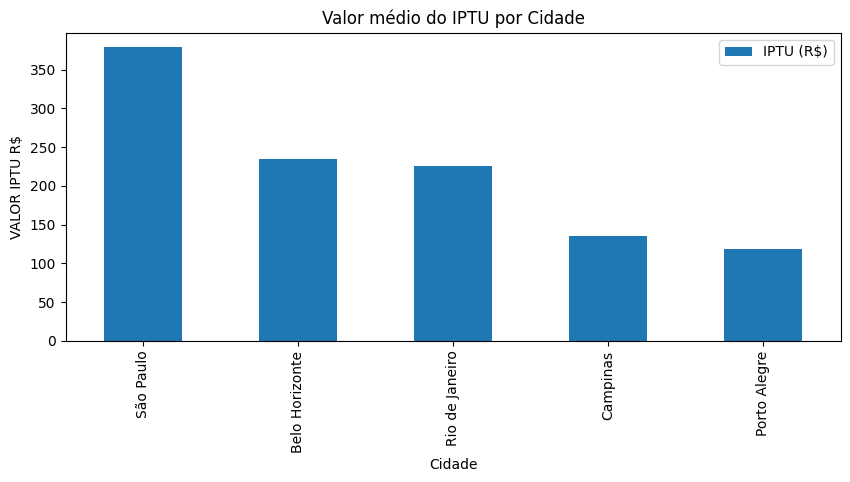

In [27]:
# mostrando o valor médio de IPTU por Cidade
iptu.plot('Cidade','IPTU (R$)',kind='bar',figsize=(10,4));
plt.title('Valor médio do IPTU por Cidade');
plt.ylabel('VALOR IPTU R$');

Podemos ver que o estado de São Paulo apresenta os maiores valores de IPTU, enquanto Porto Alegre apresenta o menor valor.

In [28]:
''' verificamos na variável 'andar' vemos que temos o valor de 2048 sem um andar atribuído e temos o andar 301 que provavelmente
é um valor digitado incorretamente pois não existe no Brasil apt com 301 andares. '''
dados_tratados['Andar'].value_counts()

-      2048
1       977
2       943
3       881
4       716
5       567
6       522
7       477
8       476
9       350
10      347
11      283
12      238
13      188
14      162
15      136
16      102
17       86
18       71
19       51
20       42
21       39
22       23
23       22
25       19
24       18
26       13
27        7
29        5
28        4
32        2
46        1
301       1
51        1
Name: Andar, dtype: int64

In [29]:
# agrupando os tipos de imóveis(casa ou apt) e se recebe ou não animais e verificando a média de valores.
grupo_animal_tipo_imovel= dados_tratados.groupby(['Andar', 'Animal'])['Total (R$)'].mean().reset_index()

In [30]:
grupo_animal_tipo_imovel

,Andar,Animal,Total (R$)
0,-,Aceita,5046.645593
1,-,Não Aceita,3241.652605
2,1,Aceita,3818.579320
3,1,Não Aceita,3316.594096
4,10,Aceita,5693.600000
...,...,...,...
59,7,Não Aceita,5398.971963
60,8,Aceita,5497.754144
61,8,Não Aceita,5198.403509
62,9,Aceita,5711.174061


In [31]:
# Aqui podemos ver a media de valores de casas e apts que aceitam ou não animais.
casas = grupo_animal_tipo_imovel[:2]
casas.replace({'-': 'Casa'}, inplace=True)
casas.rename({'Andar': 'Tipo'}, axis='columns', inplace=True)
apartamentos = grupo_animal_tipo_imovel[2:].groupby(['Animal'])['Total (R$)'].mean().reset_index()
apartamentos['Tipo'] = ['Apartamento'] * 2
grupo_animal_tipo_imovel = casas.append(apartamentos)
grupo_animal_tipo_imovel

,Tipo,Animal,Total (R$)
0,Casa,Aceita,5046.645593
1,Casa,Não Aceita,3241.652605
0,Apartamento,Aceita,6675.277441
1,Apartamento,Não Aceita,6096.508250


Podemos ver que tanto para casa quanto para apartamentos, o valor é maior para a propriedade que aceita animais.

In [32]:
# agrupando e verificandos os valores das propriedades pelo número de vagas em garagem.
vagas_estacionamento = dados_tratados.groupby('Vagas de Estacionamento')['Total (R$)'].mean().reset_index()

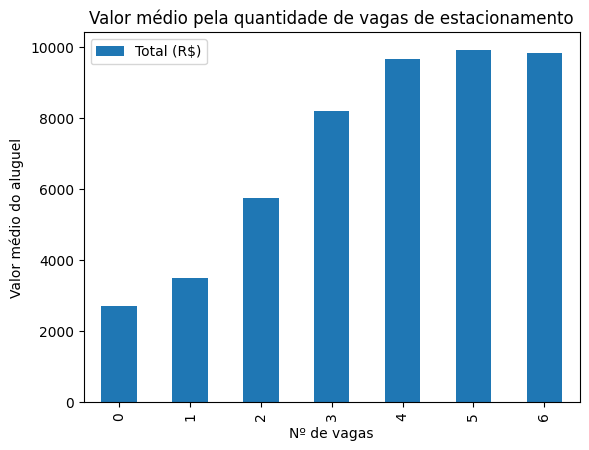

In [33]:
vagas_estacionamento.plot(kind='bar',x='Vagas de Estacionamento', y='Total (R$)');
plt.title('Valor médio pela quantidade de vagas de estacionamento');
plt.ylabel('Valor médio do aluguel');
plt.xlabel('Nº de vagas');



Podemos notar aqui que o valor médio do aluguel aumenta conforme o nº de vagas de estacionamento.

In [34]:
# substituindo o caracter especial '-' que encontrava-se na variável Andar e transformando a mesma no tipo int.
dados_tratados['Andar'] = dados_tratados['Andar'].replace('-', 0)
dados_tratados['Andar'] = dados_tratados['Andar'].astype(int)

In [35]:
# excluindo a linha pelo índice cujo valor do andar é igual a 301.
dados_tratados = dados_tratados.drop(2562, axis=0)

In [36]:
''' criando uma coluna tipo imòvel, caso o imóvel fique no andar 0 iremos consiredar que
 trata-se de uma casa, caso contrário, será considerado apartamento.
'''

dados_tratados['tipo imóvel'] = np.where(dados_tratados['Andar'] == 0, 'casa', 'apartamento')

In [37]:
# vemos aqui que temos 7769 imóveis do tipo apartamento e 2048 do tipo casa.
dados_tratados['tipo imóvel'].value_counts()

apartamento    7769
casa           2048
Name: tipo imóvel, dtype: int64

In [38]:
# agrupando o andar e o tipo do imóvel e atribuindo a uma nova variável chamada tipo_andar_imóvel
andar_tipo_imovel = dados_tratados.groupby(['Andar','tipo imóvel'])['Total (R$)'].mean().reset_index()
andar_tipo_imovel

,Andar,tipo imóvel,Total (R$)
0,0,casa,4691.463867
1,1,apartamento,3679.338792
2,2,apartamento,3693.744433
3,3,apartamento,3932.189557
4,4,apartamento,4374.201117
5,5,apartamento,4881.943563
6,6,apartamento,4960.362069
7,7,apartamento,5234.083857
8,8,apartamento,5426.060924
9,9,apartamento,5490.885714


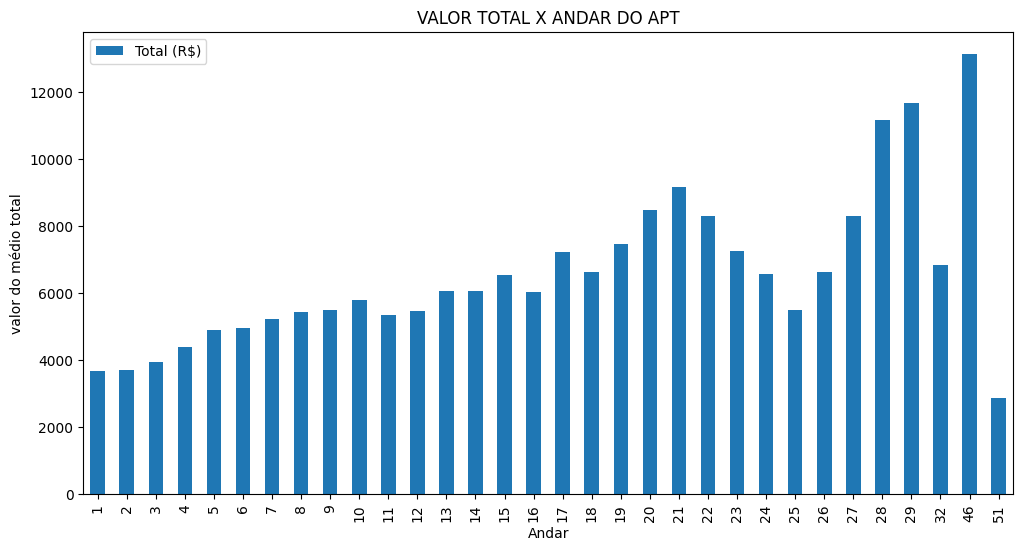

In [39]:
# Plotando os valores médios dos apartamentos por andar.
apartamentos = andar_tipo_imovel[andar_tipo_imovel['tipo imóvel']=='apartamento'];
apartamentos.plot(kind='bar', figsize=(12,6), x='Andar', y='Total (R$)' );
plt.ylabel('valor do médio total');
plt.title('VALOR TOTAL X ANDAR DO APT');

Vemos que há uma tendência dos valores dos apartamentos aumentarem conforme os andares aumentam, com algumas exceções.

In [40]:
# Calcular a média por intervalo específico de andares
primeiro_andar = andar_tipo_imovel.loc[(andar_tipo_imovel['Andar'] >= 1) & (andar_tipo_imovel['Andar'] <= 10), 'Total (R$)'].mean()
segundo_andar = andar_tipo_imovel.loc[(andar_tipo_imovel['Andar'] >= 11) & (andar_tipo_imovel['Andar'] <= 20), 'Total (R$)'].mean()
terceiro_andar = andar_tipo_imovel.loc[(andar_tipo_imovel['Andar'] >= 21) & (andar_tipo_imovel['Andar'] <= 30), 'Total (R$)'].mean()
quarto_andar = andar_tipo_imovel.loc[(andar_tipo_imovel['Andar'] >= 31) & (andar_tipo_imovel['Andar'] <= 40), 'Total (R$)'].mean()
quinto_andar = andar_tipo_imovel.loc[(andar_tipo_imovel['Andar'] >= 41) & (andar_tipo_imovel['Andar'] <= 50), 'Total (R$)'].mean()

# Imprimir as médias
print(f'Média do 1º ao 10º andar: {primeiro_andar:.2f}')
print(f'Média do 11º ao 20º andar: {segundo_andar:.2f}')
print(f'Média do 21º ao 30º andar: {terceiro_andar:.2f}')
print(f'Média do 31º ao 40º andar: {quarto_andar:.2f}')
print(f'Média do 41º ao 50º andar: {quarto_andar:.2f}')

Média do 1º ao 10º andar: 4744.73
Média do 11º ao 20º andar: 6524.71
Média do 21º ao 30º andar: 8278.23
Média do 31º ao 40º andar: 6833.00
Média do 41º ao 50º andar: 6833.00


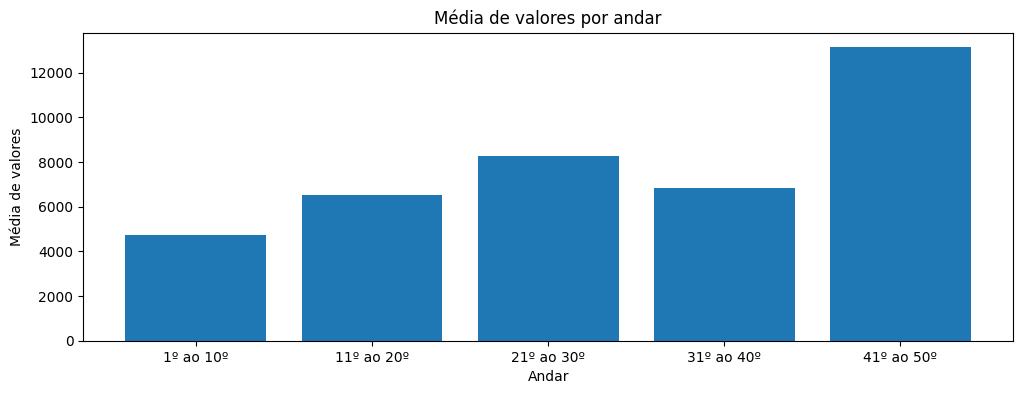

In [41]:
# Criar um gráfico de barras por intervalo específico de andares
andares = ['1º ao 10º', '11º ao 20º', '21º ao 30º','31º ao 40º','41º ao 50º']
medias = [primeiro_andar, segundo_andar, terceiro_andar, quarto_andar, quinto_andar]
plt.figure(figsize=(12,4))
plt.bar(andares, medias)

# Adicionar título e rótulos dos eixos
plt.title('Média de valores por andar')
plt.xlabel('Andar')
plt.ylabel('Média de valores')

# Exibir o gráfico
plt.show()

Vemos aqui a média dos valores aumenta conforme os blocos de andares também aumentam, com exceção do 31º ao 40º andar, essa execeção pode ser devido ao baixo número de imóveis dentro desse intervalo no conjunto de dados.